# Data preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier

# 1. label all accounts

In [2]:
# firstly, need to label all accounts.
# om1_label(First Scrum) : Manually label 407 accounts
om1_label=pd.read_csv('dicex_cleaned_om1_label.csv')

In [3]:
om1_label

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
0,12345dancing,1,1,1.343333e+00,6.333333,9.523810,3,2.000000,3,11,1.000000,1,0.0,NaN,0 human,NaN
1,1234luckyone,1,1,1.682000e-03,0.000000,4.081633,2,1.500000,2,6,1.000000,1,0.0,NaN,1 bot,NaN
2,14wkee4teosd,1,1,1.155833e+02,108.000000,12.500000,3,1.000000,1,21,1.000000,1,0.0,https://bloks.io/account/14wkee4teosd,NaN,NaN
3,15i1b2v332gv,1,1,3.225810e-04,0.032258,0.007131,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
4,1af4gv2nrpw5,1,1,3.225810e-04,0.032258,0.007155,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
5,1aisuion2gdh,1,1,3.225810e-04,0.032258,0.007117,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
6,1dcrypjazjnf,1,1,3.225810e-04,0.032258,0.007123,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
7,1ddqngdbudf4,1,1,3.225810e-04,0.032258,0.007136,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
8,1eosbeginner,1,1,1.143555e+02,21.200000,7.407407,5,1.200000,2,21,1.200000,2,0.0,NaN,NaN,NaN
9,1ffyqhg4rmbk,1,1,3.225810e-04,0.032258,0.007138,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0


In [4]:
#mini2_om1: manually label another 62 accounts,
#but some of them are the same as previous om1_label data. 
#In next step, combine them together
mini_2_om1=pd.read_csv('dicex_cleaned_mini_2_om1.csv')

In [5]:
mini_2_om1

,Unnamed: 0,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label
0,0,12345dancing,1,1,1.343333e+00,6.333333e+00,9.523810,3,2.000000,3,11,1.000000,1,0
1,1,1234luckyone,1,1,1.682000e-03,0.000000e+00,4.081633,2,1.500000,2,6,1.000000,1,0
2,2,14wkee4teosd,1,1,1.155833e+02,1.080000e+02,12.500000,3,1.000000,1,21,1.000000,1,0
3,3,15i1b2v332gv,1,1,3.225810e-04,3.225807e-02,0.007131,31,1.032258,2,32,1.000000,1,1
4,4,1af4gv2nrpw5,1,1,3.225810e-04,3.225807e-02,0.007155,31,1.032258,2,32,1.000000,1,1
5,5,1aisuion2gdh,1,1,3.225810e-04,3.225807e-02,0.007117,31,1.032258,2,32,1.000000,1,1
6,6,1dcrypjazjnf,1,1,3.225810e-04,3.225807e-02,0.007123,31,1.032258,2,32,1.000000,1,1
7,7,1ddqngdbudf4,1,1,3.225810e-04,3.225807e-02,0.007136,31,1.032258,2,32,1.000000,1,1
8,8,1eosbeginner,1,1,1.143555e+02,2.120000e+01,7.407407,5,1.200000,2,21,1.200000,2,0
9,9,1ffyqhg4rmbk,1,1,3.225810e-04,3.225807e-02,0.007138,31,1.032258,2,32,1.000000,1,1


In [6]:
for i in range(len(mini_2_om1)):
    for j in range(len(om1_label)):
        if om1_label.iloc[j,0]==mini_2_om1.iloc[i,1]:
            om1_label.iloc[j,12]=mini_2_om1.iloc[i,13]

In [7]:
human_set=om1_label[om1_label.label ==0]
human_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
0,12345dancing,1,1,1.343333e+00,6.333333,9.523810,3,2.000000,3,11,1.000000,1,0.0,NaN,0 human,NaN
1,1234luckyone,1,1,1.682000e-03,0.000000,4.081633,2,1.500000,2,6,1.000000,1,0.0,NaN,1 bot,NaN
2,14wkee4teosd,1,1,1.155833e+02,108.000000,12.500000,3,1.000000,1,21,1.000000,1,0.0,https://bloks.io/account/14wkee4teosd,NaN,NaN
8,1eosbeginner,1,1,1.143555e+02,21.200000,7.407407,5,1.200000,2,21,1.200000,2,0.0,NaN,NaN,NaN
20,1polyculture,2,2,3.871520e+06,0.200000,5.263158,5,1.000000,1,6,1.000000,1,0.0,NaN,NaN,NaN
120,51eoseos1314,1,1,8.206598e-02,0.266667,2.985075,6,1.000000,1,8,1.000000,1,0.0,NaN,NaN,NaN
121,51goplaydapp,1,1,2.000000e-02,2.000000,40.000000,2,1.500000,2,16,1.500000,2,0.0,NaN,NaN,NaN
122,51loveeos144,1,1,1.000614e+02,21.125000,7.692308,8,1.750000,3,35,1.375000,2,0.0,NaN,NaN,NaN
123,54321.x,2,2,5.082932e+01,31.000000,16.666667,3,1.333333,2,21,1.333333,2,0.0,NaN,NaN,NaN
144,a21234512345,1,1,8.734154e+01,1053.666667,16.666667,4,2.250000,4,154,2.000000,3,0.0,https://eospark.com/account/a21234512345,NaN,NaN


In [8]:
bot_set=om1_label[om1_label.label ==1]
bot_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
3,15i1b2v332gv,1,1,3.225810e-04,3.225807e-02,0.007131,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
4,1af4gv2nrpw5,1,1,3.225810e-04,3.225807e-02,0.007155,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
5,1aisuion2gdh,1,1,3.225810e-04,3.225807e-02,0.007117,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
6,1dcrypjazjnf,1,1,3.225810e-04,3.225807e-02,0.007123,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
7,1ddqngdbudf4,1,1,3.225810e-04,3.225807e-02,0.007136,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
9,1ffyqhg4rmbk,1,1,3.225810e-04,3.225807e-02,0.007138,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
10,1g2af1avccow,1,1,3.225810e-04,3.225807e-02,0.007114,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
11,1hgiojq4qqyq,1,1,3.225810e-04,3.225807e-02,0.007123,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
12,1iqs4obbhihf,1,1,3.225810e-04,3.225807e-02,0.007140,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0
13,1jzcgmtoxjxy,1,1,3.225810e-04,3.225807e-02,0.007143,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,1.0


In [9]:
#since data is imbalanced, use under-sampling 
#by deleting some of accounts that have the same action pattern
#basicly, there are two typical types of bot
bot_set=bot_set[bot_set.iloc[:,15]!=1]
bot_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
22,1rmcv1wws1ja,1,1,3.225810e-04,3.225807e-02,0.007161,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
23,1saw2tuiqhku,1,1,3.225810e-04,3.225807e-02,0.007147,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
29,23bq4xmsvlu1,1,1,3.225810e-04,3.225807e-02,0.007162,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
30,23yryojdviz1,1,1,3.225810e-04,3.225807e-02,0.007135,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
31,245vgfmuj5k5,1,1,3.225810e-04,3.225807e-02,0.007151,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
32,24c5djpng1uf,1,1,3.225810e-04,3.225807e-02,0.007159,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
33,24eos24eos24,1,1,8.784404e+01,1.586721e+03,8.695652,17,1.764706,4,447,1.176471,2,1.0,NaN,NaN,NaN
35,2cqtnp2iku4w,1,1,6.236560e-04,6.236559e-02,0.007978,31,1.064516,2,33,1.000000,1,1.0,NaN,NaN,NaN
59,321goddog123,1,1,4.675670e+01,4.750300e+03,22.222222,5,1.200000,2,243,1.000000,1,1.0,NaN,NaN,NaN
74,3orjtw4bgild,1,1,3.225810e-04,3.225807e-02,0.007154,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN


In [10]:
bot_set=bot_set[bot_set.iloc[:,15]!=2]
bot_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
22,1rmcv1wws1ja,1,1,3.225810e-04,3.225807e-02,0.007161,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
23,1saw2tuiqhku,1,1,3.225810e-04,3.225807e-02,0.007147,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
29,23bq4xmsvlu1,1,1,3.225810e-04,3.225807e-02,0.007162,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
30,23yryojdviz1,1,1,3.225810e-04,3.225807e-02,0.007135,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
31,245vgfmuj5k5,1,1,3.225810e-04,3.225807e-02,0.007151,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
32,24c5djpng1uf,1,1,3.225810e-04,3.225807e-02,0.007159,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
33,24eos24eos24,1,1,8.784404e+01,1.586721e+03,8.695652,17,1.764706,4,447,1.176471,2,1.0,NaN,NaN,NaN
35,2cqtnp2iku4w,1,1,6.236560e-04,6.236559e-02,0.007978,31,1.064516,2,33,1.000000,1,1.0,NaN,NaN,NaN
59,321goddog123,1,1,4.675670e+01,4.750300e+03,22.222222,5,1.200000,2,243,1.000000,1,1.0,NaN,NaN,NaN
74,3orjtw4bgild,1,1,3.225810e-04,3.225807e-02,0.007154,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN


In [11]:
#get our 204 accounts to train logistic regression model
train_set=bot_set.append(human_set)
train_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
22,1rmcv1wws1ja,1,1,3.225810e-04,0.032258,0.007161,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
23,1saw2tuiqhku,1,1,3.225810e-04,0.032258,0.007147,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
29,23bq4xmsvlu1,1,1,3.225810e-04,0.032258,0.007162,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
30,23yryojdviz1,1,1,3.225810e-04,0.032258,0.007135,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
31,245vgfmuj5k5,1,1,3.225810e-04,0.032258,0.007151,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
32,24c5djpng1uf,1,1,3.225810e-04,0.032258,0.007159,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN
33,24eos24eos24,1,1,8.784404e+01,1586.720588,8.695652,17,1.764706,4,447,1.176471,2,1.0,NaN,NaN,NaN
35,2cqtnp2iku4w,1,1,6.236560e-04,0.062366,0.007978,31,1.064516,2,33,1.000000,1,1.0,NaN,NaN,NaN
59,321goddog123,1,1,4.675670e+01,4750.300000,22.222222,5,1.200000,2,243,1.000000,1,1.0,NaN,NaN,NaN
74,3orjtw4bgild,1,1,3.225810e-04,0.032258,0.007154,31,1.032258,2,32,1.000000,1,1.0,NaN,NaN,NaN


In [12]:
x_train=train_set.iloc[:,1:12]
y_train=train_set.iloc[:,12]

# 2. use 204 accounts to train logistic regression. Then use lr to pick out typical bots

In [14]:
test_set=om1_label[om1_label.label !=1]
test_set=test_set[test_set.label !=0]
test_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
366,edwardadonis,1,1,3.225810e-04,3.225807e-02,0.007106,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
367,eeu5ttzogjbz,1,1,3.225810e-04,3.225807e-02,0.007128,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
368,ehvyjbs3aols,1,1,3.225810e-04,3.225807e-02,0.007116,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
369,eipk2emamjqx,1,1,3.225810e-04,3.225807e-02,0.007116,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
370,eivsczyvdhnh,1,1,3.225810e-04,3.225807e-02,0.007160,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
371,ekwnubbggqt4,1,1,3.225810e-04,3.225807e-02,0.007133,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
372,eliezeraiden,1,1,3.225810e-04,3.225807e-02,0.007164,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
373,elijahdeegan,1,1,0.000000e+00,0.000000e+00,0.001158,31,1.000000,1,31,1.000000,1,NaN,NaN,NaN,NaN
374,elkuh3cqgsgv,1,1,3.225810e-04,3.225807e-02,0.007122,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN
375,elliotdraven,1,1,3.225810e-04,3.225807e-02,0.007110,31,1.032258,2,32,1.000000,1,NaN,NaN,NaN,NaN


In [15]:
x_test=test_set.iloc[:,1:12]
x_test

,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len
366,1,1,3.225810e-04,3.225807e-02,0.007106,31,1.032258,2,32,1.000000,1
367,1,1,3.225810e-04,3.225807e-02,0.007128,31,1.032258,2,32,1.000000,1
368,1,1,3.225810e-04,3.225807e-02,0.007116,31,1.032258,2,32,1.000000,1
369,1,1,3.225810e-04,3.225807e-02,0.007116,31,1.032258,2,32,1.000000,1
370,1,1,3.225810e-04,3.225807e-02,0.007160,31,1.032258,2,32,1.000000,1
371,1,1,3.225810e-04,3.225807e-02,0.007133,31,1.032258,2,32,1.000000,1
372,1,1,3.225810e-04,3.225807e-02,0.007164,31,1.032258,2,32,1.000000,1
373,1,1,0.000000e+00,0.000000e+00,0.001158,31,1.000000,1,31,1.000000,1
374,1,1,3.225810e-04,3.225807e-02,0.007122,31,1.032258,2,32,1.000000,1
375,1,1,3.225810e-04,3.225807e-02,0.007110,31,1.032258,2,32,1.000000,1


In [16]:
logregression=LogisticRegression()
logregression.fit(x_train,y_train)

probs_y=logregression.predict_proba(x_test) 
probs_y=pd.DataFrame(data=probs_y,index=test_set.iloc[:,0])
probs_y

,0,1
d_from,,
edwardadonis,3.082895e-01,0.691710
eeu5ttzogjbz,3.082895e-01,0.691710
ehvyjbs3aols,3.082895e-01,0.691710
eipk2emamjqx,3.082895e-01,0.691710
eivsczyvdhnh,3.082896e-01,0.691710
ekwnubbggqt4,3.082895e-01,0.691710
eliezeraiden,3.082896e-01,0.691710
elijahdeegan,3.120658e-01,0.687934
elkuh3cqgsgv,3.082895e-01,0.691710


In [17]:
probs_y['label']='default'
for i in range(len(probs_y)):
    if probs_y.iloc[i,0]>0.65:
        probs_y.iloc[i,2]=0
    if probs_y.iloc[i,1]>0.65:
        probs_y.iloc[i,2]=1

In [18]:
probs_y['label']='default'
for i in range(len(probs_y)):
    if probs_y.iloc[i,0]>0.65:
        probs_y.iloc[i,2]=0
    if probs_y.iloc[i,1]>0.65:
        probs_y.iloc[i,2]=1

In [19]:
default=probs_y[probs_y['label']=='default']
default.index

Index(['eos4unervous', 'eosbangjh123', 'eosbet5admin', 'eosgjinzero2',
       'eoshongls123', 'eosjasonlisz', 'eosjustinhzh', 'eoskrishna15',
       'eosnamkyu135', 'eosscatter13', 'eossoldier11', 'eostesting22',
       'eosv5.e', 'eoszhangdj12', 'extemporized', 'ez1ez1ez1.m',
       'firstclass14', 'fitter34life', 'futurecolazb', 'g42tmojrgage',
       'g44tcmzug4ge', 'g4ztemrqgage', 'gameofwinner', 'gardenisland',
       'gdcz3355mmmm', 'ge2tsojwhege', 'ge3dmmbsgmge', 'gi3dmnbtgqge',
       'gizdmmrrgyge', 'gkfkddltkfkd', 'gm2dsnrygege', 'goforeosgame',
       'goodandlucky', 'gqzdqnzugmge', 'gqzdsnrsgyge', 'gu2daobyhage',
       'gu2tenjxguge', 'gu3tqobvhage', 'guytoobzgyge', 'guzdcnzrgqge',
       'gy2dgnrugyge', 'gy3dimzxg4ge', 'gy3temrshege', 'gyztqnjwg4ge',
       'ha3tkmjwgage', 'hezdmojthege', 'hwiyeong1234', 'j2iztkeybjq1',
       'jdceos.x', 'jixiango3133', 'jordonjagger', 'junjinwoo321',
       'jxyclxj521xh', 'kamakakskend', 'kenpfister25', 'leonatcanada',
       'lover131

In [20]:
test_set['label']=probs_y['label'].values

In [21]:
test_set

,d_from,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,Unnamed: 13,Unnamed: 14,for undersampling
366,edwardadonis,1,1,3.225810e-04,3.225807e-02,0.007106,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
367,eeu5ttzogjbz,1,1,3.225810e-04,3.225807e-02,0.007128,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
368,ehvyjbs3aols,1,1,3.225810e-04,3.225807e-02,0.007116,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
369,eipk2emamjqx,1,1,3.225810e-04,3.225807e-02,0.007116,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
370,eivsczyvdhnh,1,1,3.225810e-04,3.225807e-02,0.007160,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
371,ekwnubbggqt4,1,1,3.225810e-04,3.225807e-02,0.007133,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
372,eliezeraiden,1,1,3.225810e-04,3.225807e-02,0.007164,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
373,elijahdeegan,1,1,0.000000e+00,0.000000e+00,0.001158,31,1.000000,1,31,1.000000,1,1,NaN,NaN,NaN
374,elkuh3cqgsgv,1,1,3.225810e-04,3.225807e-02,0.007122,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN
375,elliotdraven,1,1,3.225810e-04,3.225807e-02,0.007110,31,1.032258,2,32,1.000000,1,1,NaN,NaN,NaN


In [22]:
test_set.to_csv('Desktop/final_data.csv')

# 3. still need to manually label 95 accounts

/Applications/anaconda3/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3049: DtypeWarning: Columns (15) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


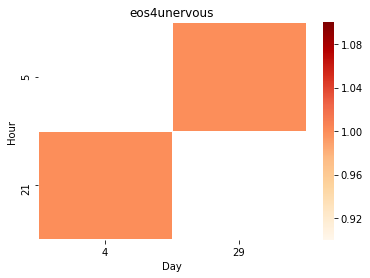

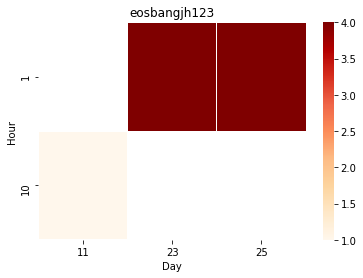

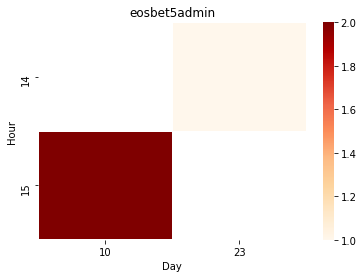

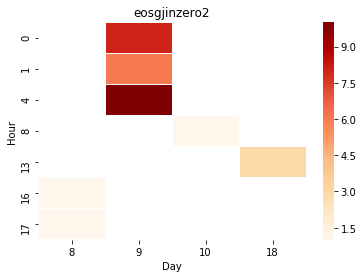

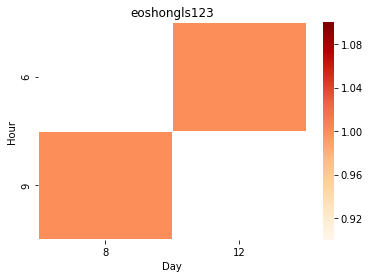

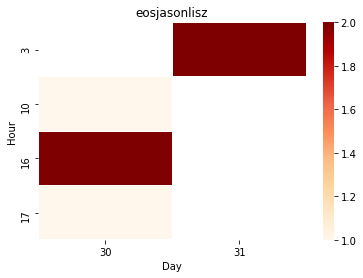

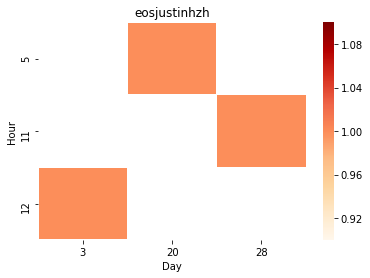

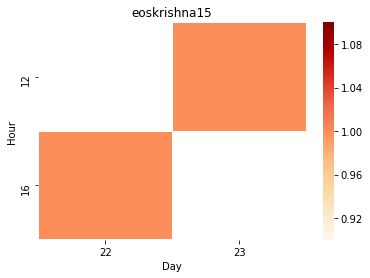

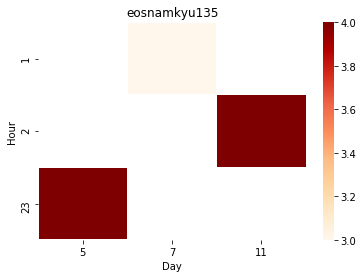

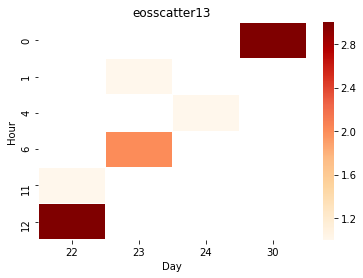

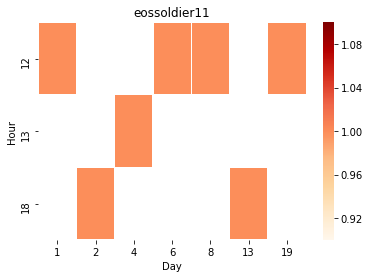

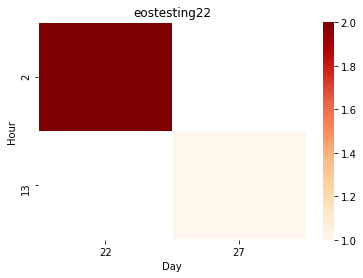

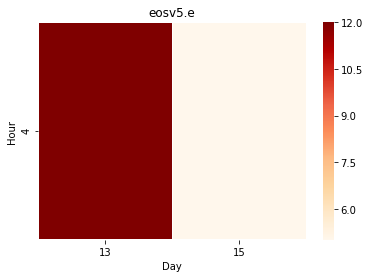

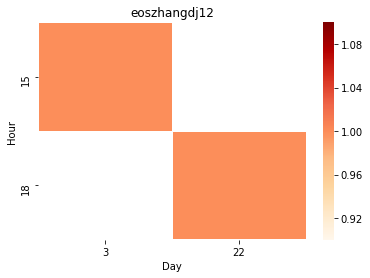

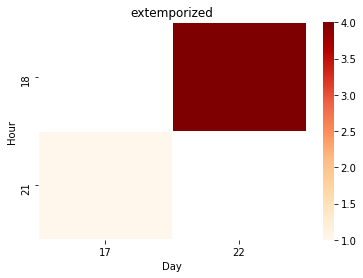

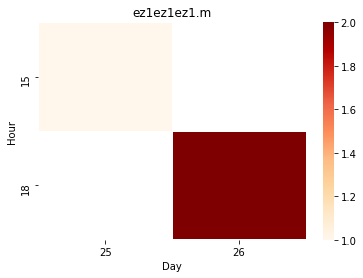

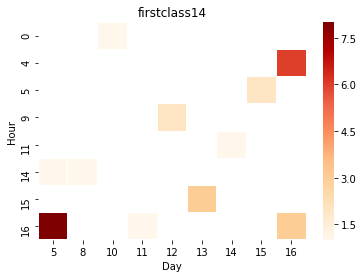

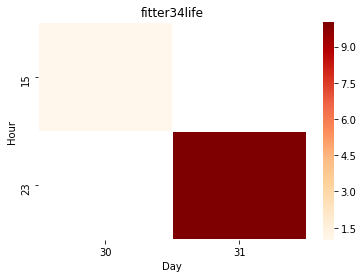

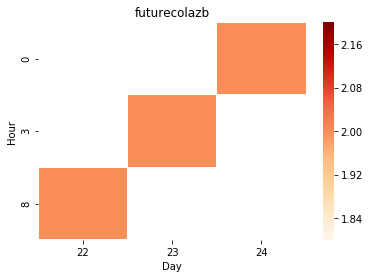

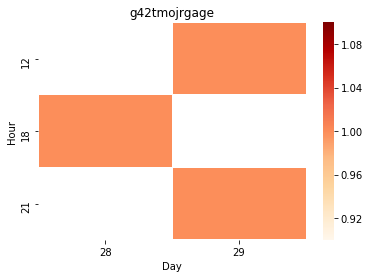

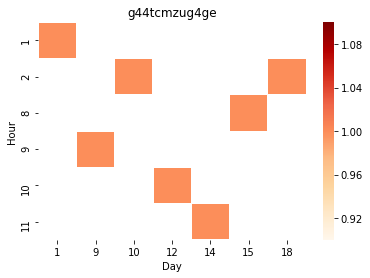

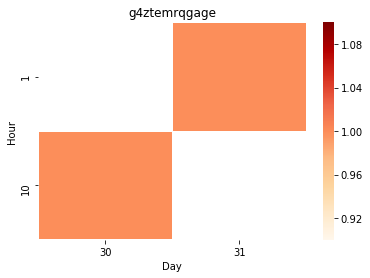

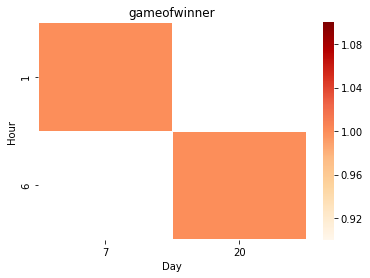

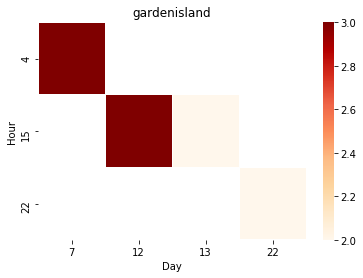

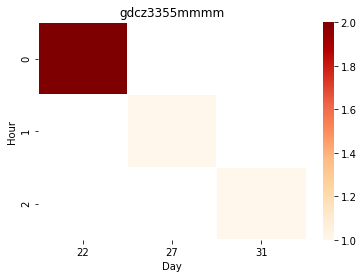

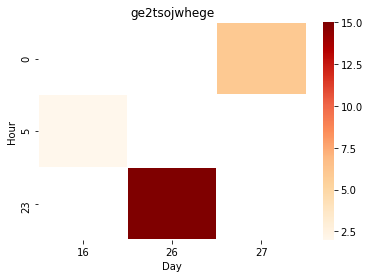

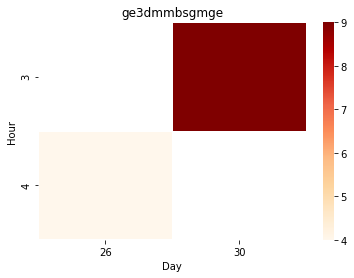

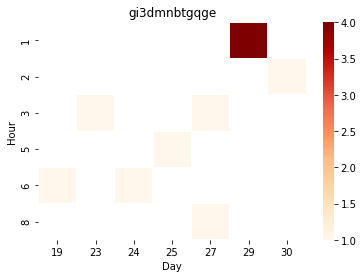

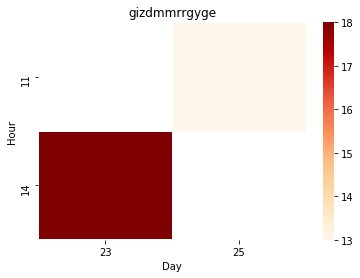

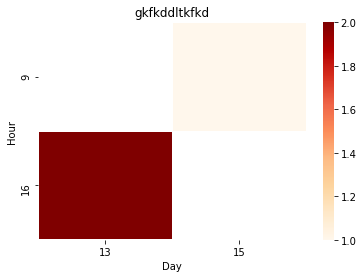

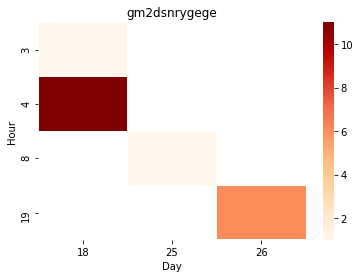

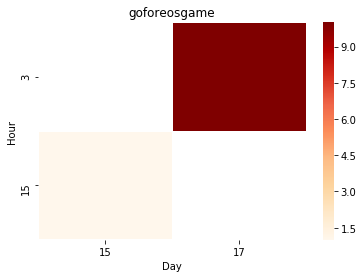

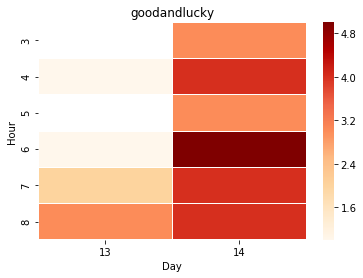

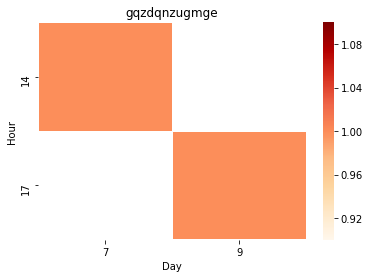

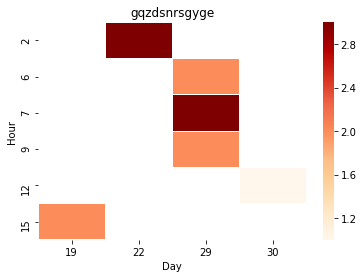

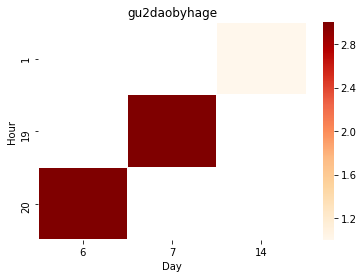

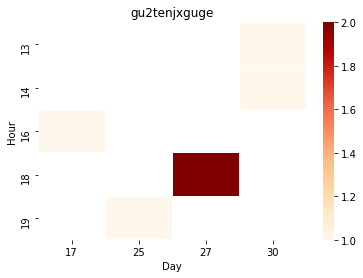

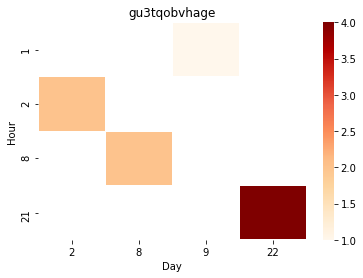

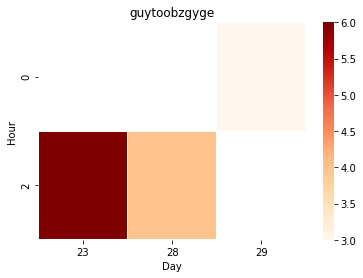

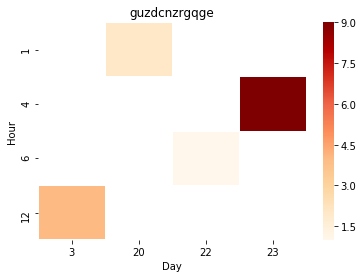

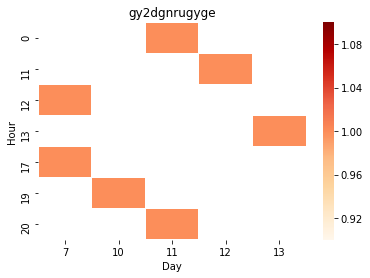

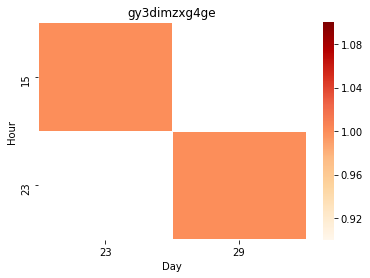

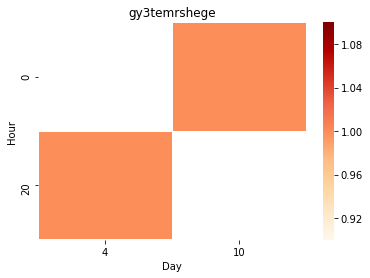

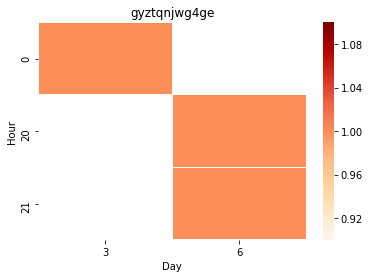

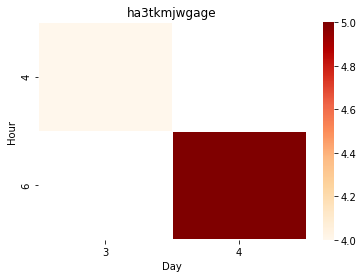

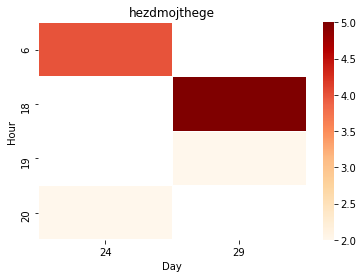

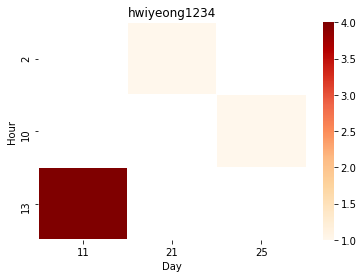

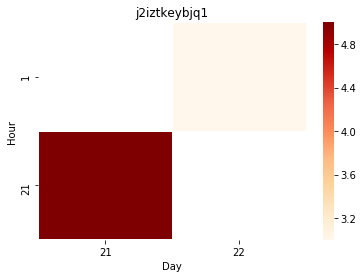

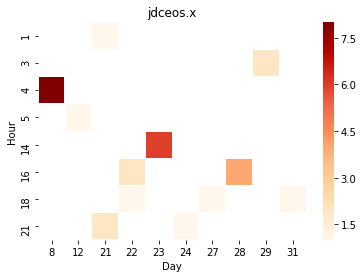

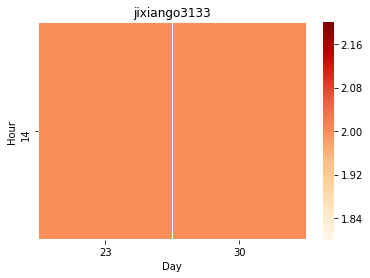

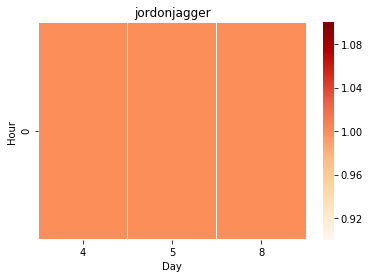

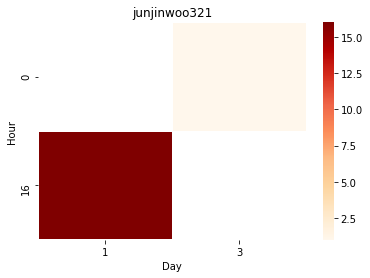

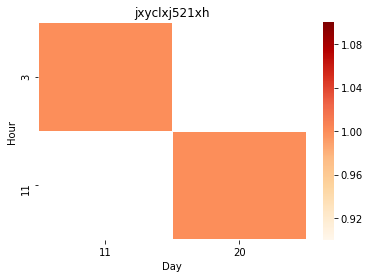

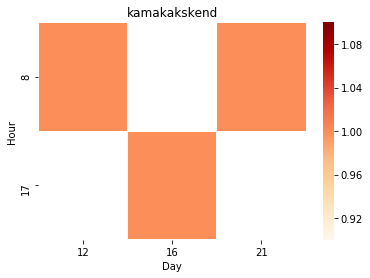

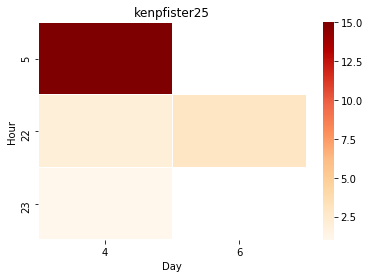

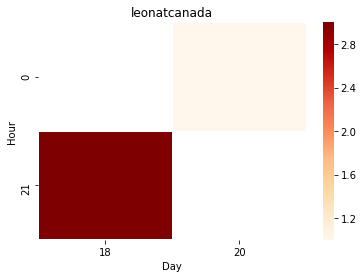

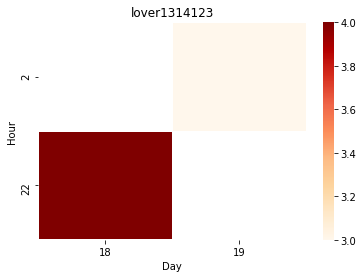

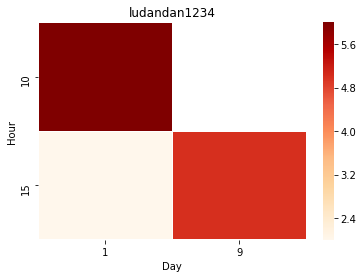

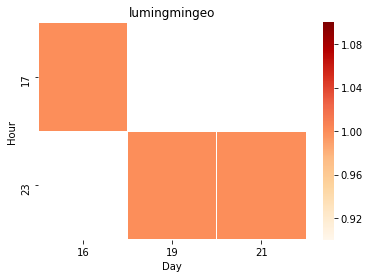

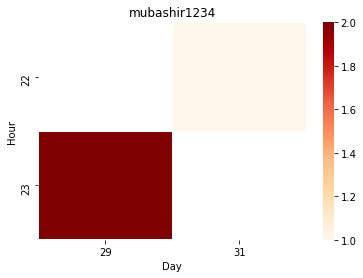

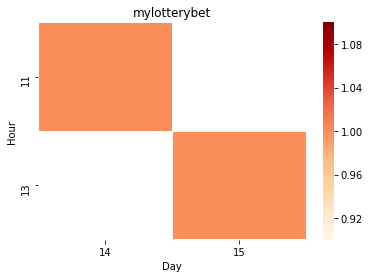

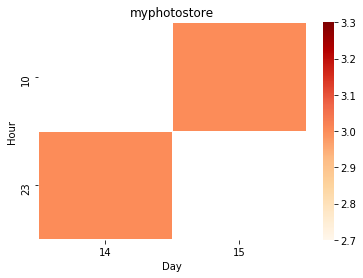

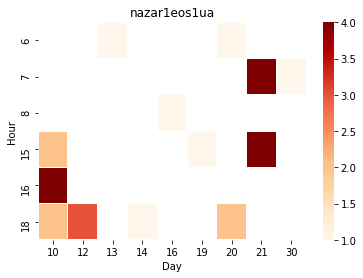

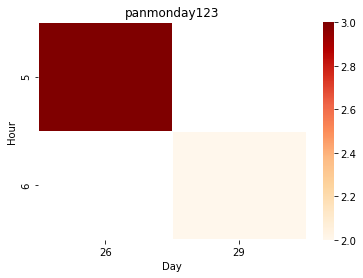

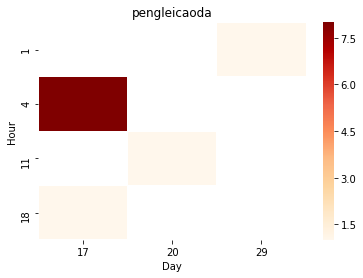

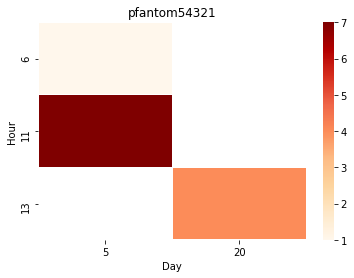

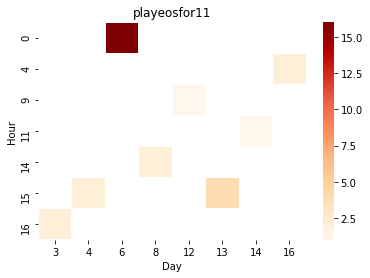

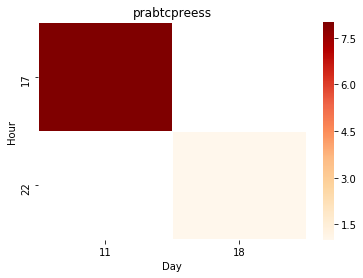

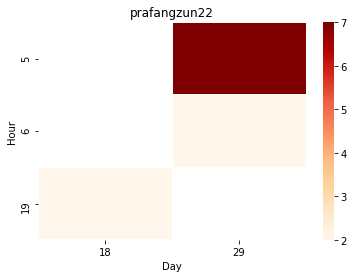

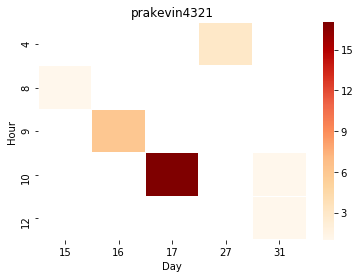

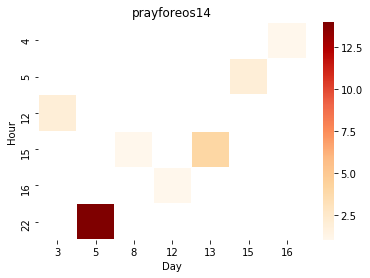

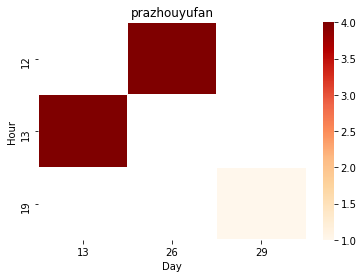

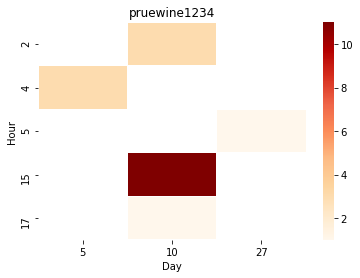

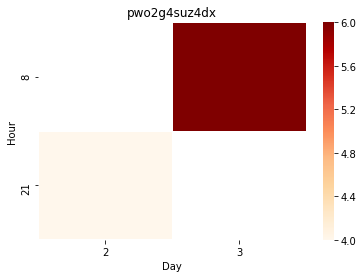

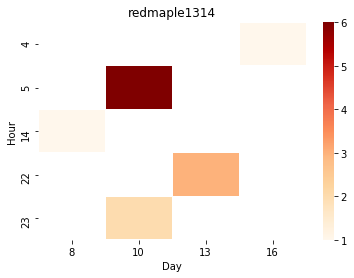

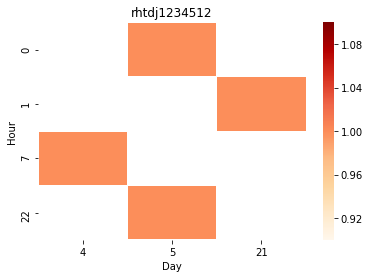

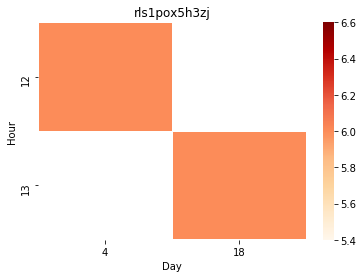

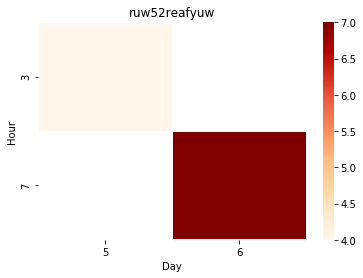

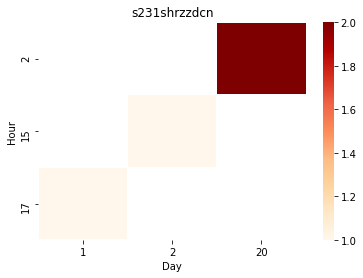

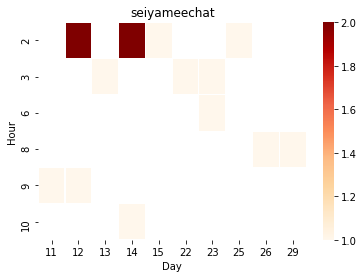

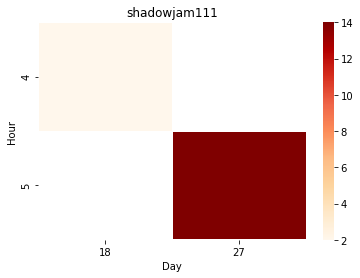

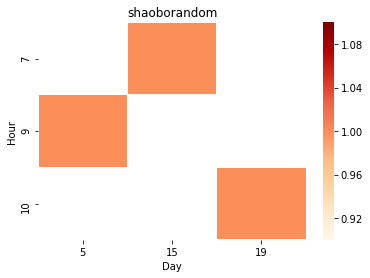

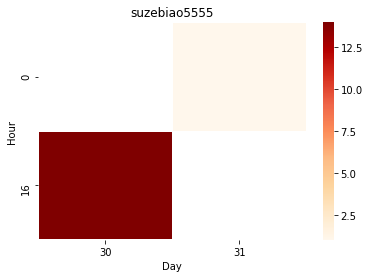

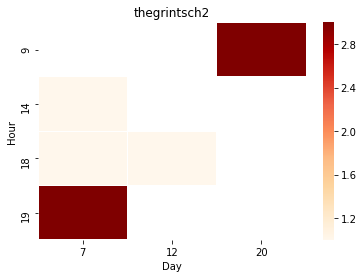

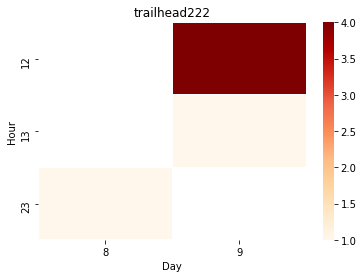

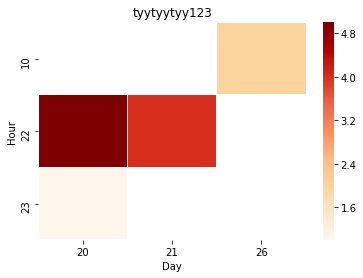

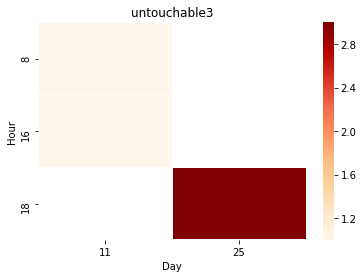

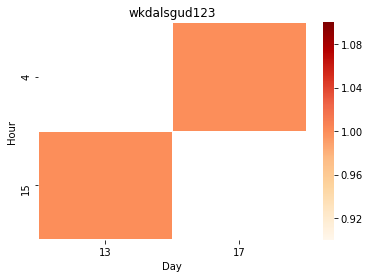

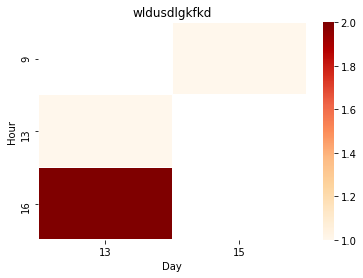

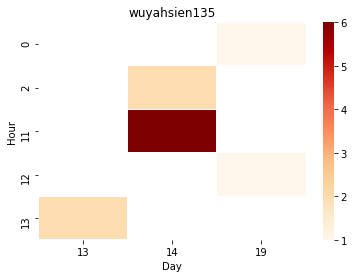

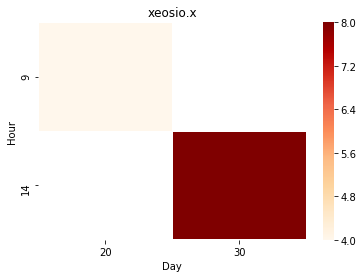

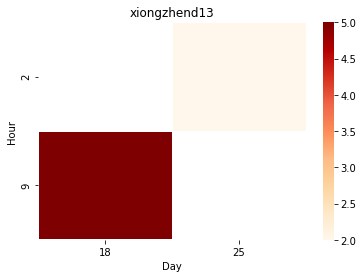

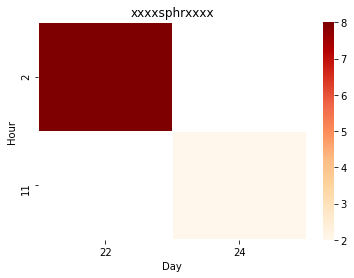

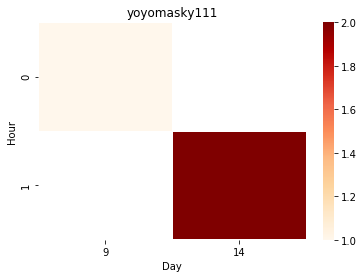

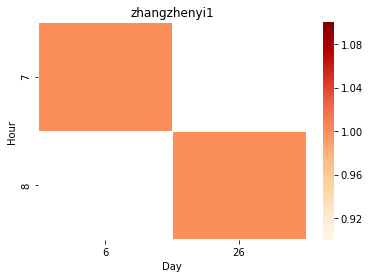

In [23]:
import seaborn as sns
whole_raw_data=pd.read_csv('dicex_data.csv')
for i in range(len(default)): 
    df = whole_raw_data[whole_raw_data['d_from']==default.index[i]]
    df2 = df.groupby(['Day','Hour']).count()['trx_id'].reset_index()
    df3 = df2.pivot(index='Hour',columns='Day',values='trx_id')
    sns.heatmap(df3,linewidths = .05, cmap='OrRd')
    plt.title(default.index[i])
    plt.show()
    

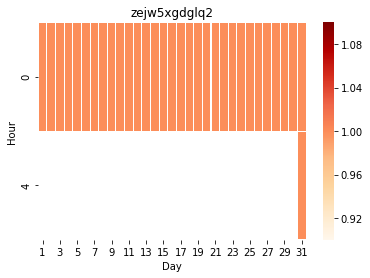

In [24]:
#zejw5xgdglq2
df = whole_raw_data[whole_raw_data['d_from']=='zejw5xgdglq2']
df2 = df.groupby(['Day','Hour']).count()['trx_id'].reset_index()
df3 = df2.pivot(index='Hour',columns='Day',values='trx_id')
sns.heatmap(df3,linewidths = .05, cmap='OrRd')
plt.title('zejw5xgdglq2')
plt.show()

In [25]:
for i in range(len(test_set)):
    if test_set.iloc[i,12]=='default':
        test_set.iloc[i,12]=0
        

In [26]:
test_set.describe()

,num_account_type,num_d_unit,quantity_variance,frequency_variance,Time_interval_rate,activity_day,activity_hour,max_active_hour,transaction_level,Active_hour_len,Max_hour_len,label,for undersampling
count,903.000000,903.000000,9.030000e+02,9.030000e+02,903.000000,903.000000,903.000000,903.000000,9.030000e+02,903.000000,903.000000,903.000000,0.0
mean,1.071982,1.083056,1.669551e+06,1.429685e+05,4.531359,24.497231,1.283670,2.269103,2.706674e+03,1.108721,1.273533,0.894795,NaN
std,0.326782,0.403382,2.488522e+07,3.789157e+06,12.854848,11.467574,1.048170,1.702225,7.607953e+04,0.800056,1.119984,0.306987,NaN
min,1.000000,1.000000,0.000000e+00,0.000000e+00,0.000048,2.000000,1.000000,1.000000,2.000000e+00,1.000000,1.000000,0.000000,NaN
25%,1.000000,1.000000,3.225810e-04,3.225807e-02,0.007119,26.000000,1.032258,2.000000,3.200000e+01,1.000000,1.000000,1.000000,NaN
50%,1.000000,1.000000,3.225810e-04,3.225807e-02,0.007141,31.000000,1.032258,2.000000,3.200000e+01,1.000000,1.000000,1.000000,NaN
75%,1.000000,1.000000,3.225810e-04,3.225807e-02,0.007162,31.000000,1.032258,2.000000,3.200000e+01,1.000000,1.000000,1.000000,NaN
max,5.000000,7.000000,5.402471e+08,1.136928e+08,100.000000,31.000000,23.838710,24.000000,2.286186e+06,23.258065,24.000000,1.000000,NaN


# Modeling

In [27]:
X_final=test_set.iloc[:,1:12]
y_final=test_set.iloc[:,12]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_final, y_final, test_size=0.20, random_state=27)

In [28]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
log_model=LogisticRegression().fit(X_train,y_train)
y_pred=log_model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

0.9723756906077348
[[ 20   2]
 [  3 156]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [29]:
CART_model=DecisionTreeClassifier().fit(X_train,y_train)
y_pred=CART_model.predict(X_test)
print(accuracy_score(y_pred, y_test))
print(confusion_matrix(y_pred, y_test))

1.0
[[ 23   0]
 [  0 158]]


/Applications/anaconda3/lib/python3.7/site-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


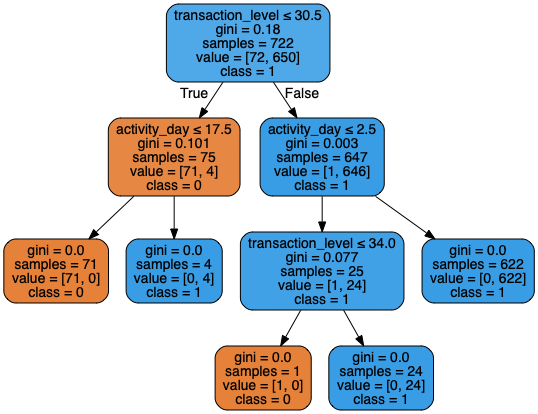

In [30]:
from sklearn.tree import export_graphviz
from sklearn.externals.six import StringIO  
from IPython.display import Image  
import pydotplus
dot_data = StringIO()
export_graphviz(CART_model, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = X_final.columns,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
#graph.write_png('cart.png')
Image(graph.create_png())


In [31]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
random_forest = RandomForestClassifier(n_estimators = 10)
random_forest.fit(X_train,y_train)
random_forest_train_acc = random_forest.score(X_train,y_train)
random_forest_test_acc = random_forest.score(X_test,y_test)
print('random_forest training acuracy= ',random_forest_train_acc)
print('random_forest test accuracy= ',random_forest_test_acc)

random_forest training acuracy=  1.0
random_forest test accuracy=  1.0


In [32]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train,y_train)
adaboost_train_acc = adaboost.score(X_train,y_train)
adaboost_test_acc = adaboost.score(X_test,y_test)
print ('adaboost training acuracy= ',adaboost_train_acc)
print('adaboost test accuracy= ',adaboost_test_acc)

adaboost training acuracy=  1.0
adaboost test accuracy=  1.0


In [33]:
importances = random_forest.feature_importances_
print(importances)
print(X_train.columns)

[0.00110381 0.00151994 0.09442746 0.01903381 0.07577794 0.11719006
 0.08299009 0.0029598  0.5979072  0.00708988 0.        ]
Index(['num_account_type', 'num_d_unit', 'quantity_variance',
       'frequency_variance', 'Time_interval_rate', 'activity_day',
       'activity_hour', 'max_active_hour', 'transaction_level',
       'Active_hour_len', 'Max_hour_len'],
      dtype='object')


Feature ranking:
transaction_level             1. feature 8 (0.597907) 
activity_day             2. feature 5 (0.117190) 
quantity_variance             3. feature 2 (0.094427) 
activity_hour             4. feature 6 (0.082990) 
Time_interval_rate             5. feature 4 (0.075778) 
frequency_variance             6. feature 3 (0.019034) 
Active_hour_len             7. feature 9 (0.007090) 
max_active_hour             8. feature 7 (0.002960) 
num_d_unit             9. feature 1 (0.001520) 
num_account_type             10. feature 0 (0.001104) 
Max_hour_len             11. feature 10 (0.000000) 


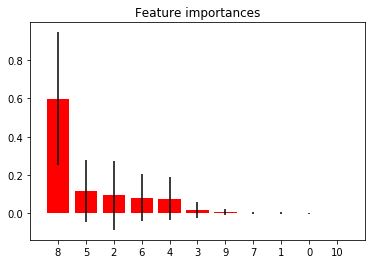

In [34]:
importances = random_forest.feature_importances_
std = np.std([tree.feature_importances_ for tree in random_forest.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(X_train.shape[1]):
    print(x_train.columns[indices[f]] +"             %d. feature %d (%f) " % (f + 1, indices[f], importances[indices[f]]))
    #print(x_train.columns[f],)

# Plot the feature importances of the forest
plt.figure()
plt.title("Feature importances")
plt.bar(range(X_train.shape[1]), importances[indices],
       color="r", yerr=std[indices], align="center")
plt.xticks(range(X_train.shape[1]), indices)
plt.xlim([-1, X_train.shape[1]])
plt.show()